# **Electric Vehicle Data Analysis and Statistics :**
This collection of code snippets performs various analyses on the dataset of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered through the Washington State Department of Licensing. The codes generate insights such as statistics on electric range by city, counts of CAFV eligibility, popularity of electric vehicle manufacturers, range statistics (max, min, average), distribution of electric vehicle types, adoption trends by model year, and adoption by county. The results are saved in CSV files and visualized through bar charts, line charts, and pie charts. These analyses provide valuable insights into the electric vehicle landscape and adoption patterns in Washington State.

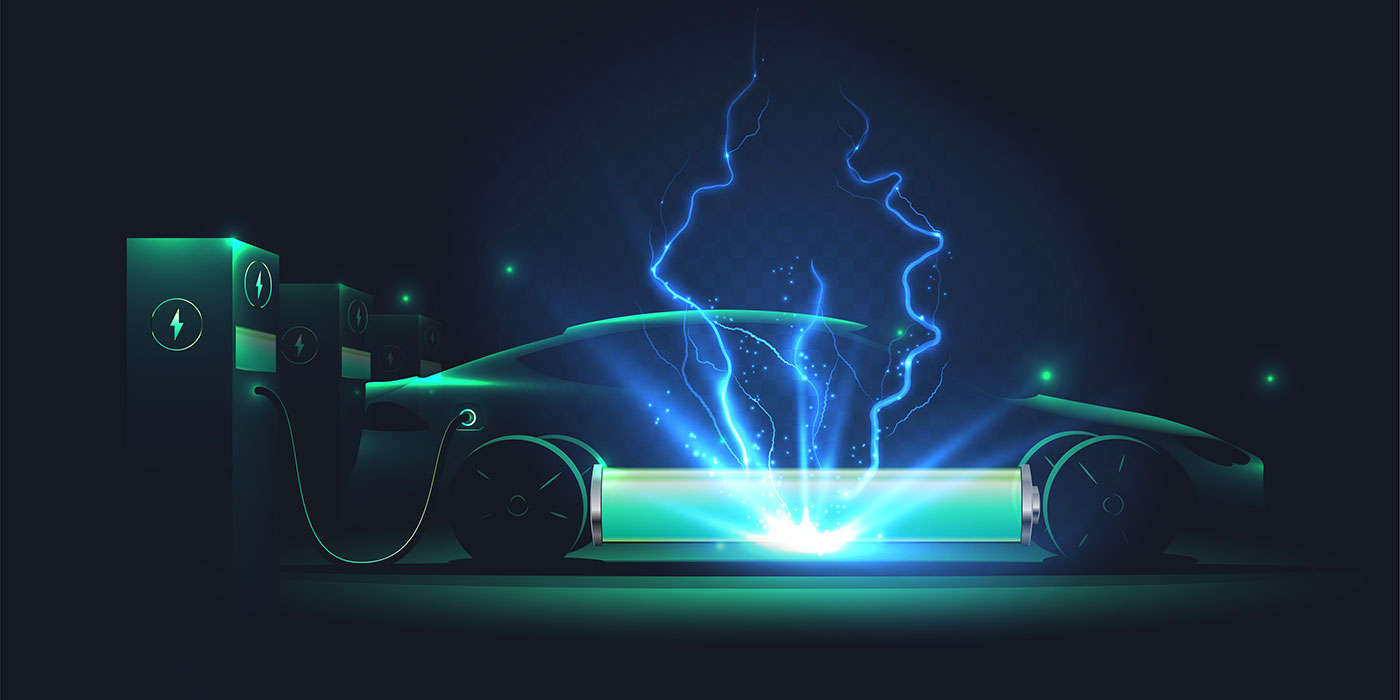

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/electric-vehicle-data-1997-2024-update-version/us_car_data.csv")

# Count of Electric Vehicles by County :
This code counts the number of electric vehicles in the dataset for each county. The counts are then saved to a CSV file named "count_by_county.csv".

In [3]:
count_by_county = data["County"].value_counts()
count_by_county.to_csv("count_by_county.csv")

In [4]:
count_by_county

King            70682
Snohomish       15226
Pierce          10394
Clark            7983
Thurston         4844
Kitsap           4452
Spokane          3326
Whatcom          3313
Benton           1687
Skagit           1500
Island           1495
Clallam           830
Jefferson         824
San Juan          802
Chelan            794
Yakima            735
Cowlitz           663
Mason             638
Lewis             515
Grays Harbor      475
Kittitas          453
Franklin          440
Grant             409
Walla Walla       344
Douglas           261
Whitman           230
Klickitat         217
Okanogan          191
Stevens           175
Pacific           164
Skamania          158
Asotin             55
Wahkiakum          45
Pend Oreille       40
Adams              39
Lincoln            32
Ferry              25
Columbia           15
Garfield            3
Name: County, dtype: int64

In [5]:
# Define a custom color palette
colors = sns.color_palette('Paired', len(count_by_county))

# Bar Chart of Electric Vehicle Adoption by County :
This code creates a bar chart showing the adoption of electric vehicles in each county. Each bar represents a county, and the height of the bar represents the count of electric vehicles in that county. The x-axis is labeled as "County", the y-axis is labeled as "Count", and the chart title is "Electric Vehicle Adoption by County".

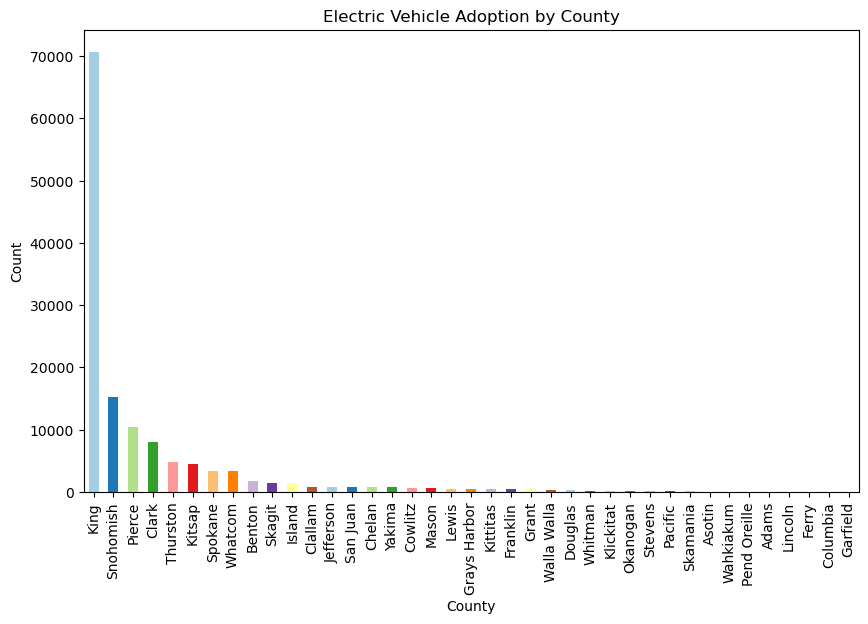

In [6]:
plt.figure(figsize=(10, 6))
count_by_county.plot(kind='bar', color=colors)
plt.xlabel("County")
plt.ylabel("Count")
plt.title("Electric Vehicle Adoption by County")
plt.show()

# Count of Electric Vehicles by Model Year :
This code counts the number of electric vehicles in the dataset for each model year. The counts are sorted in ascending order based on the model year, and the results are saved to a CSV file named "count_by_year.csv".

In [7]:
count_by_year = data["Model Year"].value_counts().sort_index()
count_by_year.to_csv("count_by_year.csv")

In [8]:
count_by_year

1997        1
1998        1
1999        4
2000        9
2002        2
2003        1
2008       19
2010       23
2011      815
2012     1655
2013     4589
2014     3588
2015     4910
2016     5676
2017     8557
2018    14314
2019    10555
2020    11119
2021    18478
2022    27919
2023    22209
2024       30
Name: Model Year, dtype: int64

# Line Chart of Electric Vehicle Adoption Trends by Year :
This code creates a line chart showing the adoption trends of electric vehicles over different model years. The x-axis represents the model years, while the y-axis represents the count of electric vehicles. The chart displays the trend of electric vehicle adoption over time. The title of the chart is "Electric Vehicle Adoption Trends by Year".

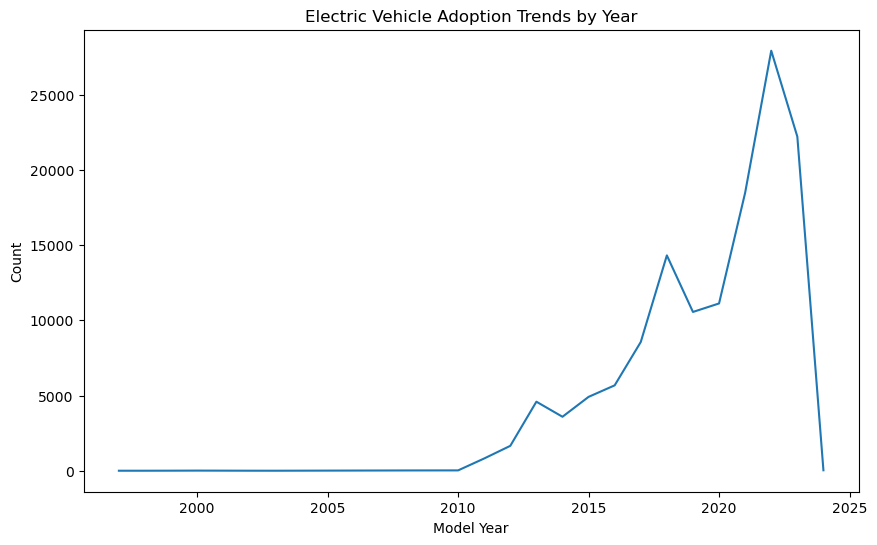

In [9]:
plt.figure(figsize=(10, 6))
count_by_year.plot(kind='line')
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.title("Electric Vehicle Adoption Trends by Year")
plt.show()

# Count of Electric Vehicle Types :
This code counts the occurrences of each electric vehicle type in the dataset and saves the count to a CSV file named "vehicle_types.csv".

In [10]:
vehicle_types = data["Electric Vehicle Type"].value_counts()
vehicle_types.to_csv("vehicle_types.csv")

In [11]:
vehicle_types

Battery Electric Vehicle              103424
Plug-in Hybrid Electric Vehicle        31050
Name: Electric Vehicle Type, dtype: int64

# Pie Chart of Electric Vehicle Types Distribution :
This code creates a pie chart displaying the distribution of different types of electric vehicles. Each slice of the pie represents a specific vehicle type, and the percentage of each type is shown on the chart. The title of the chart is "Distribution of Electric Vehicle Types".

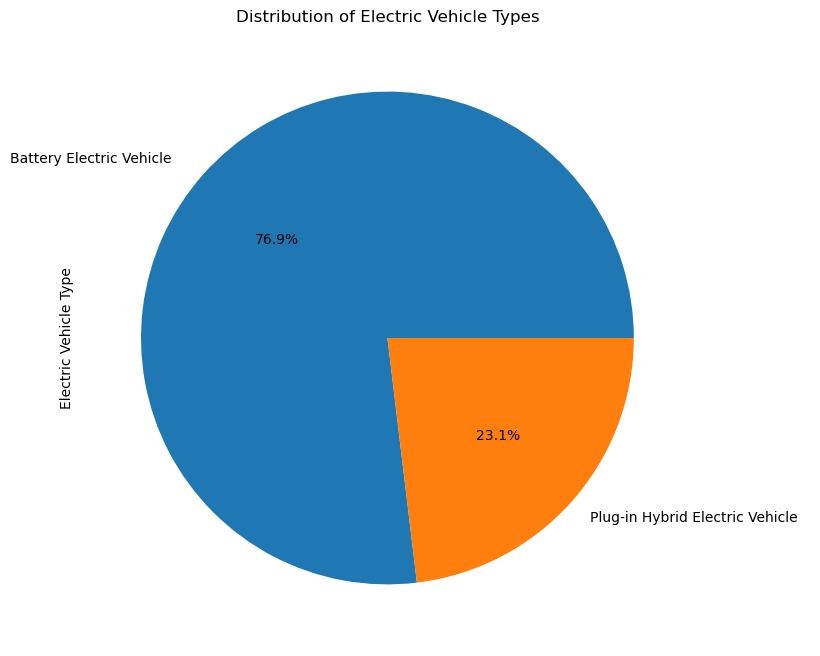

In [12]:
plt.figure(figsize=(8, 8))
vehicle_types.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Electric Vehicle Types")
plt.show()

# Electric Vehicle Range Statistics :
This code calculates the maximum, minimum, and average electric ranges of the vehicles in the dataset. The statistics are then saved to a CSV file named "range_stats.csv".

In [13]:
max_range = data["Electric Range"].max()
min_range = data["Electric Range"].min()
avg_range = data["Electric Range"].mean()

range_stats = pd.DataFrame({
    "Max Range": [max_range],
    "Min Range": [min_range],
    "Average Range": [avg_range]
})

range_stats.to_csv("range_stats.csv")

In [14]:
range_stats

,Max Range,Min Range,Average Range
0,337,0,74.730208


# Top 5 Popular Electric Vehicle Manufacturers :
This code counts the occurrences of each electric vehicle manufacturer in the dataset and selects the top 5 manufacturers with the highest counts. The results are then saved to a CSV file named "popular_makes.csv".

In [15]:
popular_makes = data["Make"].value_counts().head(5)
popular_makes.to_csv("popular_makes.csv")

In [16]:
popular_makes

TESLA        61650
NISSAN       13138
CHEVROLET    11417
FORD          6876
BMW           5881
Name: Make, dtype: int64

# Bar Chart of Popular Electric Vehicle Manufacturers :
This code creates a bar chart showing the count of electric vehicles by popular manufacturers. The chart is displayed with the x-axis labeled as "Make" representing the manufacturers and the y-axis labeled as "Count" representing the number of vehicles. The title of the chart is "Popular Electric Vehicle Manufacturers."

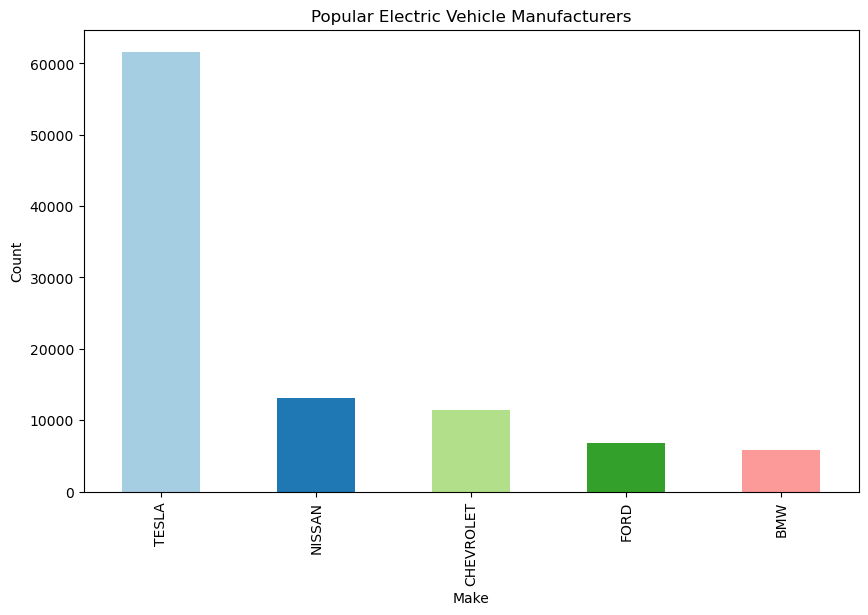

In [17]:
plt.figure(figsize=(10, 6))
popular_makes.plot(kind='bar', color=colors)
plt.xlabel("Make")
plt.ylabel("Count")
plt.title("Popular Electric Vehicle Manufacturers")
plt.show()

# Count of CAFV Eligibility :
This code counts the number of vehicles eligible for the Clean Alternative Fuel Vehicle (CAFV) program and saves the count to a CSV file named "cafvs.csv".

In [18]:
cafvs = data["CAFV"].value_counts()
cafvs.to_csv("cafvs.csv")

In [19]:
cafvs

Clean Alternative Fuel Vehicle Eligible                         61082
Eligibility unknown as battery range has not been researched    56618
Not eligible due to low battery range                           16774
Name: CAFV, dtype: int64

# Analysis of Electric Range Statistics by City :
This code groups the data by city and calculates the minimum, maximum, and mean electric range for each city. The resulting statistics are then saved to a CSV file named "city_stats.csv".

In [20]:
grouped_cities = data.groupby("City")
city_stats = grouped_cities["Electric Range"].agg(["min", "max", "mean"])
city_stats.to_csv("city_stats.csv")

In [21]:
city_stats

,min,max,mean
City,,,
Aberdeen,0,293,76.151261
Acme,19,238,102.000000
Addy,0,25,12.500000
Airway Heights,0,322,95.650000
Alderdale,0,0,0.000000
...,...,...,...
Yacolt,0,289,59.212121
Yakima,0,330,68.377551
Yarrow Point,0,330,105.317829


# **Electric Vehicle Type Prediction using XGBoost and Data Preprocessing :**
This code performs the prediction of electric vehicle types based on given features using the XGBoost algorithm. The code includes data preprocessing steps such as identifying string columns, dropping irrelevant columns, encoding categorical variables, and one-hot encoding. It then splits the data into training and testing sets, creates DMatrix objects for XGBoost, defines the XGBoost model parameters, trains the model, and makes predictions on the testing data. Finally, it calculates the accuracy of the model's predictions.

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Identification of String Columns :

In [23]:
string_columns = data.select_dtypes(include=['object']).columns

In [24]:
print("Colonnes contenant des chaînes de caractères :")
for column in string_columns:
    print(column)

Colonnes contenant des chaînes de caractères :
County
City
State
Make
Model
Electric Vehicle Type
CAFV
Electric Utility


# Dropping Irrelevant Columns :

In [25]:
columns_to_drop = ['County', 'Electric Utility']
data = data.drop(columns_to_drop, axis=1)

# Encoding Categorical Variables :

In [26]:
label_encoder = LabelEncoder()
categorical_columns = ['City', 'State', 'Make', 'Model', 'Electric Vehicle Type']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# One-Hot Encoding of Electric Vehicle Type :

In [27]:
one_hot_encoded = pd.get_dummies(data['Electric Vehicle Type'], prefix='EVType')
data = pd.concat([data, one_hot_encoded], axis=1)

In [28]:
print(data.head())

   City  State  Postal Code  Model Year  Make  Model  Electric Vehicle Type  \
0   411      0        98512        2019    30     71                      0   
1    71      0        98236        2022    24     69                      0   
2   368      0        98290        2020    30     71                      0   
3   350      0        98134        2020    30     71                      0   
4   111      0        98020        2013    30     72                      0   

                                                CAFV  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             220   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle Eligible             266   
3            Clean Alternative Fuel Vehicle Eligible             322   
4            Clean Alternative Fuel Vehicle Eligible             208   

   Base MSRP  Legislative District  DOL Vehicle ID  2020 Census Tract  \
0          0       

In [29]:
features = ['Model Year', 'Make', 'Model']
target = 'Electric Vehicle Type'

# Splitting Data into Train and Test Sets :

In [30]:
train_data, test_data, train_target, test_target = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Creating DMatrix for Training and Testing Data :
This code creates DMatrix objects for the training and testing data using the xgb.DMatrix function from the XGBoost library. It takes the training data (train_data) and its corresponding target (train_target) to create dtrain. Similarly, it creates dtest using the testing data (test_data) and its target (test_target). DMatrix is a data structure used by XGBoost for efficient training and prediction.

In [31]:
dtrain = xgb.DMatrix(train_data, label=train_target)
dtest = xgb.DMatrix(test_data, label=test_target)

# Defining XGBoost Model Parameters :

In [32]:
params = {
    'objective': 'multi:softmax',
    'num_class': len(data[target].unique()), 
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'gamma': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'merror'
}

# Training the XGBoost Model :

In [33]:
model = xgb.train(params, dtrain, num_boost_round=100)

# Making Predictions and Calculating Accuracy :

In [34]:
predictions = model.predict(dtest)

In [35]:
predictions = [int(round(pred)) for pred in predictions]

In [36]:
accuracy = accuracy_score(test_target, predictions)
print("Exactitude : {:.2f}%".format(accuracy * 100))

Exactitude : 99.00%


# **Comparison of Actual and Predicted Electric Vehicle Types :**

In [37]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix :

In [38]:
conf_matrix = confusion_matrix(test_target, predictions)

# Display the confusion matrix :

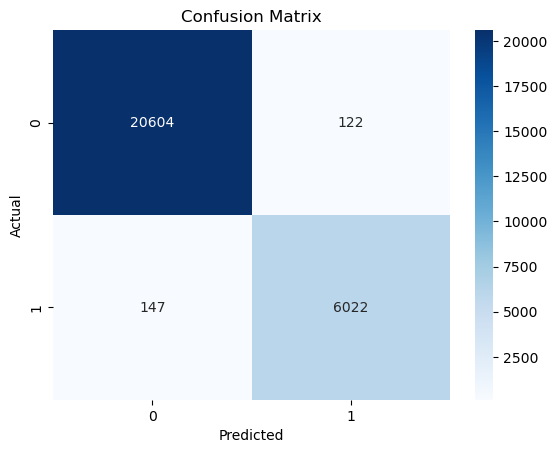

In [39]:
# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the confusion matrix
plt.show()

# Create a DataFrame with actual and predicted values :

In [40]:
comparison_df = pd.DataFrame({'Actual': test_target, 'Predicted': predictions})

# Add columns to indicate different prediction categories :

In [41]:
comparison_df['True Positive'] = (comparison_df['Actual'] == 1) & (comparison_df['Predicted'] == 1)
comparison_df['True Negative'] = (comparison_df['Actual'] == 0) & (comparison_df['Predicted'] == 0)
comparison_df['False Positive'] = (comparison_df['Actual'] == 0) & (comparison_df['Predicted'] == 1)
comparison_df['False Negative'] = (comparison_df['Actual'] == 1) & (comparison_df['Predicted'] == 0)

# Set the style of the plot :

In [42]:
sns.set(style='whitegrid')

# Plot a countplot comparing the actual and predicted values :

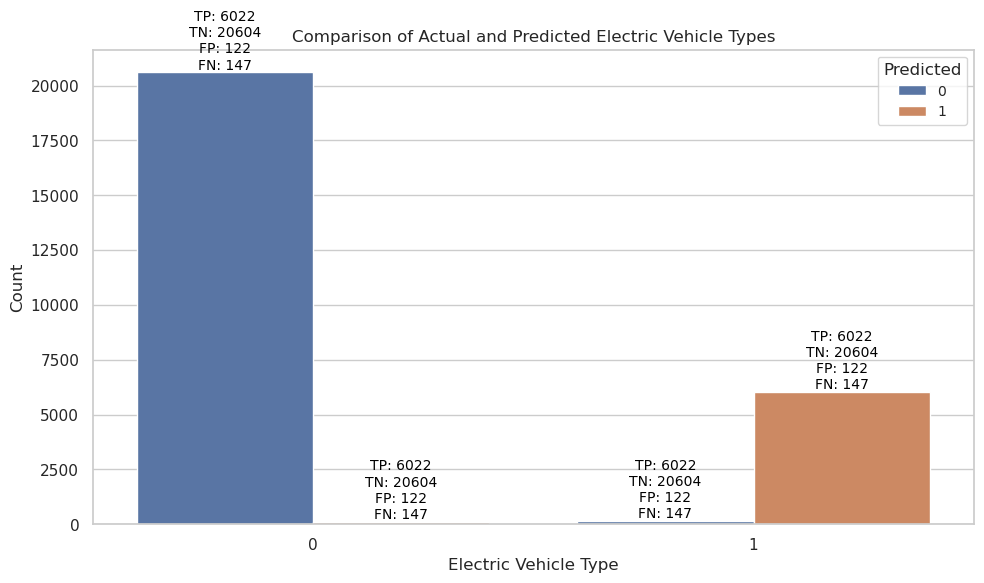

In [43]:
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='Actual', hue='Predicted', data=comparison_df)

plt.xlabel('Electric Vehicle Type', fontsize=12)  # Set the label for the x-axis
plt.ylabel('Count', fontsize=12)  # Set the label for the y-axis
plt.title('Comparison of Actual and Predicted Electric Vehicle Types', fontsize=12) 

plt.legend(title='Predicted', loc='upper right', fontsize=10)

for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 3
    ax.annotate(f'TP: {comparison_df["True Positive"].sum()}\nTN: {comparison_df["True Negative"].sum()}\nFP: {comparison_df["False Positive"].sum()}\nFN: {comparison_df["False Negative"].sum()}', 
                (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()

plt.show()